In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

Gráficos

In [2]:
df1 = pd.read_csv(r"monitor_por_comentario1.csv")
df2 = pd.read_csv(r"monitor_por_comentario2.csv")
df_monitor = pd.concat([df1, df2]).groupby(['user_id']).sum().reset_index()
df_monitor["cargo"] = "monitor"
df_monitor

,user_id,count,cargo
0,885,184,monitor
1,1760,302,monitor
2,1773,58,monitor
3,1778,14,monitor
4,2839,7,monitor


In [3]:
df1 = pd.read_csv(r"distribuicao_professor_comentario1.csv")
df2 = pd.read_csv(r"distribuicao_professor_comentario2.csv")
df_prof = pd.concat([df1, df2]).groupby(['user_id']).sum().reset_index()
df_prof["cargo"] = "professor"
df_prof

,user_id,count,cargo
0,695,14,professor
1,925,14,professor
2,1754,4,professor
3,1755,6,professor
4,1778,14,professor
5,3180,3,professor


In [4]:
df_cargo

NameError: name 'df_cargo' is not defined

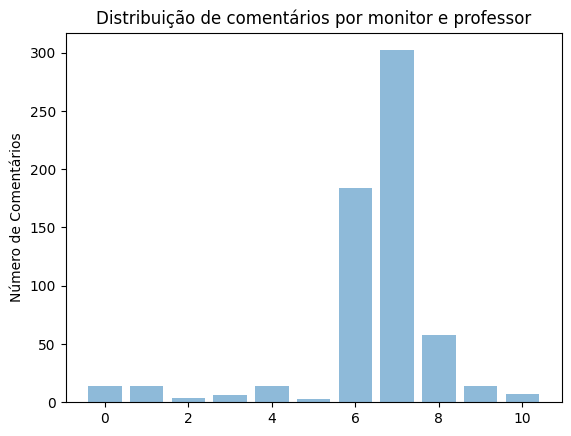

In [9]:
df_cargo = pd.concat ([df_prof, df_monitor], axis=0).reset_index()

plt.bar(df_cargo.index, df_cargo["count"], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.ylabel('Número de Comentários')
plt.title('Distribuição de comentários por monitor e professor')

plt.show()

Carregar informações do csv

In [4]:
df1 = pd.read_csv(r'comments1_complete.csv')
df2 = pd.read_csv(r'comments2_complete.csv')
df1.rename(columns={"comment" : "content"}, inplace=True)

df = pd.concat([df1, df2], ignore_index=True)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 200
                       ):
    print(df["content"])

0                                                                                                                                                                                                         Teste
1                                                                                                                                                                            Solução só funciona para inteiros.
2                                                                                                                                                                                                    indentação
3                                                                                                                                                não faz sentido restringir o preço e o dinheiro para inteiros.
4                                                                                                                          não se esqueça de apagar a linha de instrução

Tratamento dos comentários

In [5]:
df['content'] = df['content'].str.lower()


df['content'] = df['content'].replace({"\r":''}, regex=True)
df['content'] = df['content'].replace({r"1\. corretude do código: \d{1,2}\/75":''}, regex=True)
df['content'] = df['content'].replace({r"1\. corretude do código - \d{1,2}\/75":''}, regex=True)
df['content'] = df['content'].replace({r"2\. documentação do código: \d{1,2}\/25":''}, regex=True)
df['content'] = df['content'].replace({r"2\. documentação do código - \d{1,2}\/25":''}, regex=True)
df['content'] = df['content'].replace({r"nota: \d{1,3}\/100":''}, regex=True)
df['content'] = df['content'].replace({r"2\. implementação da documentação: \d{1,2}\/25":''}, regex=True)
df['content'] = df['content'].replace({r"2\. documentação: \d{1,2}\/25":''}, regex=True)

df['content'] = df['content'].replace({"\n":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\(":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\)":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\"":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\'":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\,":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\.":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\-":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\:":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\?":''}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"\/":''}, regex=True)#/shop/(.*?)\.htm /25 - 


df['content'] = df['content'].replace({"indentação":'identação'}, regex=True)#/shop/(.*?)\.htm /25 - 

df['content'] = df['content'].replace({"útlimo":'último'}, regex=True)#/shop/(.*?)\.htm /25 - 
df['content'] = df['content'].replace({"defaulta":'default'}, regex=True)#/shop/(.*?)\.htm /25 - 

df['content'] = df['content'].replace({"25":''}, regex=True)
df['content'] = df['content'].replace({"75":''}, regex=True)
df['content'] = df['content'].replace({"50":''}, regex=True)
df['content'] = df['content'].replace({"100":''}, regex=True)
df['content'] = df['content'].replace({"15":''}, regex=True)
df['content'] = df['content'].replace({"90":''}, regex=True)


#df['content'] = df['content'].replace({"1\. corretude do código: \d{1,2}\/75 2\. documentação do código: \d{1,2}\/25 - ":' '}, regex=True)#/shop/(.*?)\.htm /25 - 
#df['content'] = df['content'].replace({"1\. corretude do código - \d{1,2}\/75 2\. documentação do código - \d{1,2}\/25 - ":' '}, regex=True)#/shop/(.*?)\.htm /25 - 

#df['content'] = df['content'].replace({"documentação do código:":' '}, regex=True)
#df['content'] = df['content'].replace('solução só', ' ')
#df['content'] = df['content'].replace('25', ' ')
#df['content'] = df['content'].replace('75', ' ')

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 300
                       ):
    print(df['content'] )


0                                                                                                                                                                                                                                                                                                             teste
1                                                                                                                                                                                                                                                                                 solução só funciona para inteiros
2                                                                                                                                                                                                                                                                                                         identação
3                                                                           

In [6]:
stop = stop_words_pt = ["de", "da", "das", "do", "dos", "o", "os", "a", "as", "um", "uma", "umas", "uns", 
                        "qual", "quais", "para", "se", "que", "por", "e", "aquele", "aquela", "aquilo"]

df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df

,problem_id,user_id,title,content
0,840,421,3. Bolos,teste
1,838,1,Bombons,solução só funciona inteiros
2,838,695,Bombons,identação
3,838,695,Bombons,não faz sentido restringir preço dinheiro inte...
4,838,695,Bombons,não esqueça apagar linha instrução inicial fic...
...,...,...,...,...
2219,744,1760,Hashtag,
2220,744,1760,Hashtag,comentário precisa ser dentro função
2221,742,885,Substituição,1 variavel x não é inteiro mas sim string
2222,734,1760,Futebol,


Separação manual dos comentários por palavras interessantes

In [7]:
strings = ["gambiarra", "apresentável", "desnecessário", "valor", "orientação", "operação", "erro",\
           "math", "tuple", "fatiamento", "necessariamente", "ruim", "criar", "mudar", "não faz sentido",\
            "significativo", "errou", "default", "pensa aqui comigo", "pense bem", "tricotomia", "retorno", "posição",\
            "desnecessária", "aproximação", "importar", "confuso", "confusa", "não existe", "não existem", "string"\
            "automático", "indentar", "indentou", "separado", "separados", "sintático", "sintáticos", "não funcionou"\
            "não funciona", "falha", "falhas"]

df_selected = df[df["content"].str.contains('|'.join(strings))]

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 100
                       ):
    print(df_selected)
    #display(df_selected) --aparece todas as linhas na saída

      problem_id  user_id                           title  \
3            838      695                         Bombons   
4            838      695                         Bombons   
5            838      695                         Bombons   
6            838      695                         Bombons   
8            840     1778                        3. Bolos   
9            839     1778               2. quantos carros   
10           840     1778                        3. Bolos   
11           838     1778                         Bombons   
12           839     1778               2. quantos carros   
14           734      695                         Futebol   
15           840     1778                        3. Bolos   
16           802     1754     Positivo, Negativo ou Zero?   
18           804      925                       Filtragem   
19           806      925  Detectando colisões com tuplas   
21           804      925                       Filtragem   
70           802     176

Número de professores e questões dos comentários

In [8]:
#df_selected.groupby("user_id").size()
#df_selected["user_id"].value_counts(normalize=True).reset_index()
df_selected["user_id"].value_counts().reset_index()

,user_id,count
0,885,124
1,1760,28
2,1773,13
3,1778,12
4,695,10
5,925,7
6,2839,4
7,1754,2
8,1755,2
9,3180,2


In [9]:
#df_selected.groupby("problem_id").count()
#df_selected["problem_id"].value_counts(normalize=True).reset_index()
df_selected["problem_id"].value_counts().reset_index()

,problem_id,count
0,804,34
1,802,30
2,734,25
3,840,22
4,735,20
5,838,19
6,839,18
7,736,16
8,742,14
9,806,6


Lematização

In [10]:
import spacy

nlp = spacy.load("pt_core_news_lg")

In [11]:
#aux = nlp(df_selected["content"].head(1).to_string())

df_selected["lem"] = df_selected["content"].apply(lambda row : nlp(row))
df_selected["lem"] = df_selected["lem"].apply(lambda row : " ".join([token.lemma_ for token in row]))

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 150
                       ):
    print(df_selected["lem"])

#aux = nlp(aux)
#aux2 = " ".join([token.lemma_ for token in aux])

3                                                                                                         não fazer sentido restringir preço dinheiro inteiro
4                                                                                         não esquecer apagar linha instrução inicial ficar mais apresentável
5         primeiro tentativa estar muito gambiarra ! procurar sempre fazer mais simples possível estar ir gambiarra não ser bom sinal sibre qualidade solução
6                           pensar bem em como obter solução problema não ficar tentar correção errar uso nome não significativo atrapalhar raciocínio também
8                                                                      questão 3 errar detalhe fórmula final retorno seu função pois dever retornar mina2b3c5
9                                                                              você a o invés usar seu parâmetro “ c ” retornar seu função usar valor default
10                                       como cada i

<ipython-input-11-e5b03a78dd45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["lem"] = df_selected["content"].apply(lambda row : nlp(row))
<ipython-input-11-e5b03a78dd45>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["lem"] = df_selected["lem"].apply(lambda row : " ".join([token.lemma_ for token in row]))


Stemming

In [12]:
import nltk

stemmer = nltk.stem.RSLPStemmer()
string = "copiar"

df_selected["stem"] = df_selected["content"].apply(lambda row : " ".join([stemmer.stem(word) for word in row.split()]))

with pd.option_context('display.max_rows', None,
                      'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 150
                       ):
    print(df_selected["stem"])



3                                                                                                                         não faz sent restring preç dinh int
4                                                                                                         não esqueç apag linh instruç inic fic mais apresent
5                                             prim tent est muit gambiarra! procur sempr faz mais simpl possível est ind gamb não é bom sinal sibr qual soluç
6                                                    pens bem em com obt soluç problem não fic tent correç err uso nom não signific atrapalh raciocíni também
8                                                                                    quest 3 err detalh fórmul final retorn sua funç poi dev retorn mina2b3c5
9                                                                                            voc ao invé us seu parâmetr “c” retorn sua funç usou val default
10                                                  

<ipython-input-12-477772288928>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["stem"] = df_selected["content"].apply(lambda row : " ".join([stemmer.stem(word) for word in row.split()]))


In [13]:
df_selected['stem']

3                     não faz sent restring preç dinh int
4       não esqueç apag linh instruç inic fic mais apr...
5       prim tent est muit gambiarra! procur sempr faz...
6       pens bem em com obt soluç problem não fic tent...
8       quest 3 err detalh fórmul final retorn sua fun...
                              ...                        
2145    document tá boa mas vari folh não exist pel do...
2160    per foi no automáico funç não tev retorn poi c...
2197    pos i não é string descr est log acim funç é n...
2208                       1 val varia x é string não int
2209                       1 val varia x é string não int
Name: stem, Length: 204, dtype: object

Topic modeling with Top2vector

https://towardsdatascience.com/how-to-perform-topic-modeling-with-top2vec-1ae9bb4e89dc

In [14]:
from top2vec import Top2Vec

#model = Top2Vec(df_selected['lem'].values)
model = Top2Vec(df_selected['stem'].values)#, embedding_model='universal-sentence-encoder')

ModuleNotFoundError: No module named 'top2vec'

In [ ]:
print(model.get_num_topics())

model.topic_words

Modelagem de tópicos com LDA

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/lmoraes/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/lmoraes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df_selected["content"]))

In [18]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [19]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_words_bigrams = make_bigrams(data_words)

In [20]:
data_words_bigrams

[['nao', 'faz', 'sentido', 'restringir', 'preco', 'dinheiro', 'inteiros'],
 ['nao',
  'esqueca',
  'apagar',
  'linha',
  'instrucao',
  'inicial',
  'ficar',
  'mais',
  'apresentavel'],
 ['primeira',
  'tentativa',
  'estava',
  'muito',
  'gambiarra',
  'procure',
  'sempre',
  'fazer',
  'mais',
  'simples',
  'possivel',
  'esta',
  'indo',
  'gambiarra',
  'nao',
  'bom',
  'sinal',
  'sibre',
  'qualidade',
  'solucao'],
 ['pense',
  'bem',
  'em',
  'como',
  'obter',
  'solucao',
  'problema',
  'nao',
  'ficar',
  'tentando',
  'correcoes',
  'erradas',
  'uso',
  'nomes',
  'nao',
  'significativos',
  'atrapalha',
  'raciocinio',
  'tambem'],
 ['questao',
  'errou',
  'detalhe',
  'formula',
  'final',
  'retorno',
  'sua',
  'funcao',
  'pois',
  'devia',
  'retornar',
  'mina'],
 ['voce',
  'ao',
  'inves',
  'usar',
  'seu',
  'parametro',
  'retornar',
  'sua',
  'funcao',
  'usou',
  'valor',
  'default'],
 ['como',
  'cada',
  'ingrediente',
  'tem',
  'valor',
  'dif

In [21]:

data_lemmatized = lemmatization(data_words_bigrams)#, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [22]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [23]:
corpus[2]

[(1, 1),
 (3, 1),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1)]

In [24]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [25]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.143*"valor" + 0.128*"variavel" + 0.109*"inteiro" + 0.031*"entrada" + 0.018*"funcao" + 0.018*"carro" + 0.017*"fazer" + 0.016*"faltar" + 0.013*"numero" + 0.013*"nao"'), (1, '0.032*"funcao" + 0.028*"erro" + 0.020*"identacao" + 0.018*"funcionar" + 0.017*"codigo" + 0.016*"dever" + 0.016*"informar" + 0.015*"caso" + 0.012*"voce" + 0.011*"variavel"'), (2, '0.075*"acima" + 0.056*"funcao" + 0.048*"nao" + 0.044*"documentacao" + 0.041*"colocar" + 0.039*"posicao" + 0.039*"dar" + 0.038*"string" + 0.038*"logo" + 0.038*"entendam"'), (3, '0.090*"nao" + 0.083*"retorno" + 0.074*"cair" + 0.054*"ter" + 0.048*"tipo" + 0.047*"entrada" + 0.039*"possuir" + 0.038*"documentacao" + 0.037*"nota" + 0.037*"elses"'), (4, '0.066*"string" + 0.036*"retorno" + 0.029*"entrada" + 0.029*"importar" + 0.025*"modulo" + 0.025*"nao" + 0.024*"funcao" + 0.023*"necessidade" + 0.020*"certo" + 0.020*"numero"')]


In [26]:
import numpy as np

In [27]:
#get raw topic > word estimates
topics_terms = lda_model.state.get_lambda() 

#convert estimates to probability (sum equals to 1 per topic)
topics_terms_proba = np.apply_along_axis(lambda x: x/x.sum(),1,topics_terms)

# find the right word based on column index
words = [lda_model.id2word[i] for i in range(topics_terms_proba.shape[1])]

#put everything together
pd.DataFrame(topics_terms_proba,columns=words)

,dinheiro,fazer,inteiro,nao,preco,restringir,sentido,apagar,apresentavel,esquecar,...,iniciar,nivel,pertencer,posicionamento,propria,regra,seguir,ser,sintatico,ver
0,0.000386,0.016745,0.108508,0.012967,0.000386,0.000386,0.008051,0.000385,0.000385,0.000385,...,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385,0.000385
1,0.000906,0.000909,0.000906,0.010856,0.000906,0.000906,0.000906,0.000906,0.000906,0.000906,...,0.003863,0.003863,0.003863,0.003863,0.003863,0.003863,0.003863,0.003863,0.003863,0.003863
2,0.000315,0.014308,0.000315,0.048437,0.000315,0.000315,0.000315,0.000315,0.000315,0.001039,...,0.000315,0.000315,0.000315,0.000315,0.000315,0.000315,0.000315,0.000315,0.000315,0.000315
3,0.000312,0.000315,0.000312,0.090341,0.000312,0.000312,0.000313,0.000312,0.000312,0.000312,...,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313,0.000313
4,0.004539,0.013011,0.000697,0.024880,0.004539,0.004539,0.010010,0.004542,0.004542,0.004542,...,0.000692,0.000692,0.000692,0.000692,0.000692,0.000692,0.000692,0.000692,0.000692,0.000692


In [32]:
lda_model.show_topics()

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.143*"valor" + 0.128*"variavel" + 0.109*"inteiro" + 0.031*"entrada" + 0.018*"funcao" + 0.018*"carro" + 0.017*"fazer" + 0.016*"faltar" + 0.013*"numero" + 0.013*"nao"'),
 (1,
  '0.032*"funcao" + 0.028*"erro" + 0.020*"identacao" + 0.018*"funcionar" + 0.017*"codigo" + 0.016*"dever" + 0.016*"informar" + 0.015*"caso" + 0.012*"voce" + 0.011*"variavel"'),
 (2,
  '0.075*"acima" + 0.056*"funcao" + 0.048*"nao" + 0.044*"documentacao" + 0.041*"colocar" + 0.039*"posicao" + 0.039*"dar" + 0.038*"string" + 0.038*"logo" + 0.038*"entendam"'),
 (3,
  '0.090*"nao" + 0.083*"retorno" + 0.074*"cair" + 0.054*"ter" + 0.048*"tipo" + 0.047*"entrada" + 0.039*"possuir" + 0.038*"documentacao" + 0.037*"nota" + 0.037*"elses"'),
 (4,
  '0.066*"string" + 0.036*"retorno" + 0.029*"entrada" + 0.029*"importar" + 0.025*"modulo" + 0.025*"nao" + 0.024*"funcao" + 0.023*"necessidade" + 0.020*"certo" + 0.020*"numero"')]

In [64]:
corpus

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)],
 [(1, 1),
  (3, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(3, 2),
  (10, 1),
  (27, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(33, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1)],
 [(47, 1), (50, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1)],
 [(48, 1),
  (50, 1),
  (52, 1),
  (54, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1)],
 [(47, 1),
  (50, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1)],
 [(37, 1), (47, 1), (49, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(36, 1), (7

In [67]:
all_topics = lda_model.get_document_topics(corpus, per_word_topics=True)
doc_topics_matrix = np.zeros((len(corpus), 5))

for idx, t in enumerate(all_topics):
    (doc_topics, word_topics, phi_values) = t
    print('New Document \n')
    print('Document topics:', doc_topics)
    for (tidx, perc) in doc_topics:
        doc_topics_matrix[idx, tidx] = perc
    print('Word topics:', word_topics)
    print('Phi values:', phi_values)
    print(" ")
    print('-------------- \n')

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New Document 

Document topics: [(0, 0.21778129), (3, 0.010708774), (4, 0.7615853)]
Word topics: [(0, [4]), (1, [4, 0]), (2, [0]), (3, [4, 0]), (4, [4]), (5, [4]), (6, [4, 0])]
Phi values: [(0, [(4, 0.99920493)]), (1, [(0, 0.23602434), (4, 0.76396483)]), (2, [(0, 0.99923253)]), (3, [(0, 0.10305516), (4, 0.89693755)]), (4, [(4, 0.99920493)]), (5, [(4, 0.99920493)]), (6, [(0, 0.1588815), (4, 0.84110236)])]
 
-------------- 

New Document 

Document topics: [(0, 0.0103340745), (4, 0.97152394)]
Word topics: [(7, [4]), (8, [4]), (9, [4]), (10, [4]), (11, [4]), (12, [4]), (13, [4]), (14, [4])]
Phi values: [(7, [(4, 0.99995863)]), (8, [(4, 0.99995863)]), (9, [(4, 0.99995863)]), (10, [(4, 0.9999575)]), (11, [(4, 0.99995863)]), (12, [(4, 0.99995863)]), (13, [(4, 0.99998176)]), (14, [(4, 0.9999592)])]
 
-------------- 

New Document 

Document topics: [(2, 0.98739064)]
Word topics: [(1, [2]), (3, [2]), (14, [2]), (15, [2]), (16, [2]), (17, [2]), (18, [2]), (19, [2]), (20, [2]), (21, [2]), (22, [

New Document 

Document topics: [(3, 0.2110212), (4, 0.7749871)]
Word topics: [(3, [4, 3]), (94, [4, 3]), (131, [3, 4]), (149, [3]), (181, [4]), (229, [4]), (250, [4]), (252, [4]), (256, [4]), (257, [4]), (280, [4])]
Phi values: [(3, [(3, 0.47101513), (4, 0.5289812)]), (94, [(3, 0.2778894), (4, 0.722106)]), (131, [(3, 0.5539792), (4, 0.44601268)]), (149, [(3, 0.99713105)]), (181, [(4, 0.99988407)]), (229, [(4, 0.99932855)]), (250, [(4, 0.9999267)]), (252, [(4, 0.99990517)]), (256, [(4, 0.99988467)]), (257, [(4, 0.999915)]), (280, [(4, 0.99932903)])]
 
-------------- 

New Document 

Document topics: [(0, 0.019987423), (2, 0.011957568), (3, 0.018211279), (4, 0.9449232)]
Word topics: [(61, [4]), (181, [4]), (250, [4]), (257, [4])]
Phi values: [(61, [(4, 0.9999887)]), (181, [(4, 0.99999315)]), (250, [(4, 0.99999523)]), (257, [(4, 0.9999946)])]
 
-------------- 

New Document 

Document topics: [(0, 0.013623964), (3, 0.012413411), (4, 0.9624582)]
Word topics: [(3, [4]), (250, [4]), (252, [

In [73]:
def sort_distribution(df, columns, MIN_PROB=0.3):
    ids = []

    for col in columns:
        ids = ids + df[df[col] > MIN_PROB].sort_values([col], ascending=False).index.tolist()
    
    for col in columns:
        ids = ids + df.sort_values([col], ascending=False).index.tolist()

    index = df.loc[ids].index.drop_duplicates()
    df_sorted = df.loc[index]
    return df_sorted

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
columns = ["Topic %d" %i for i in range(1,6)]
df = pd.DataFrame(doc_topics_matrix, columns=columns)

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
df_sorted = sort_distribution(df, columns, MIN_PROB=0.3)

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

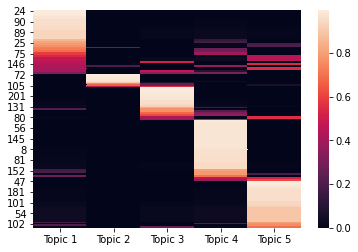

In [76]:
import seaborn as sns
sns.heatmap(df_sorted)

In [44]:
def color_words(model, doc):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    # make into bag of words
    doc = model.id2word.doc2bow(doc)
    # get word_topics
    doc_topics, word_topics, phi_values = model.get_document_topics(doc, per_word_topics=True)

    # color-topic matching
    topic_colors = { 1:'red', 0:'blue', 2:'green', 3:'black', 4:'yellow'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(doc)
    
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


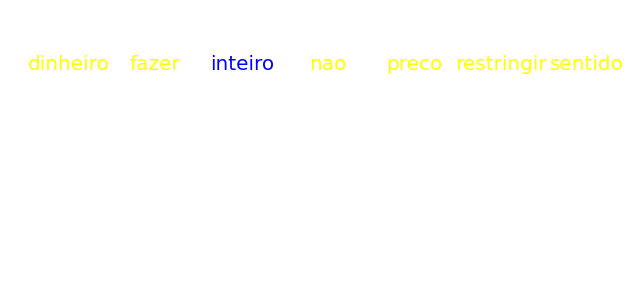

In [45]:
color_words(lda_model, texts[0])

In [61]:
def color_words_dict(model, dictionary):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches

    word_topics = []
    for word_id in dictionary:
        word = str(dictionary[word_id])
        # get_term_topics returns static topics, as mentioned before
        probs = model.get_term_topics(word)
        # we are creating word_topics which is similar to the one created by get_document_topics
        try:
            if probs[0][1] >= probs[1][1]:
                word_topics.append((word_id, [0, 1]))
            else:
                word_topics.append((word_id, [1, 0]))
        # this in the case only one topic is returned
        except IndexError:
            if len(probs)==0:
                continue
            word_topics.append((word_id, [probs[0][0]]))
            
    # color-topic matching
    topic_colors = { 1:'red', 0:'blue', 2:'green', 3:'black', 4:'yellow'}
    
    # set up fig to plot
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    # a sort of hack to make sure the words are well spaced out.
    word_pos = 1/len(dictionary)
         
    # use matplotlib to plot words
    for word, topics in word_topics:
        ax.text(word_pos, 0.8, model.id2word[word],
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, color=topic_colors[topics[0]],  # choose just the most likely topic
                transform=ax.transAxes)
        word_pos += 0.2 # to move the word for the next iter

    ax.set_axis_off()
    plt.show()

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


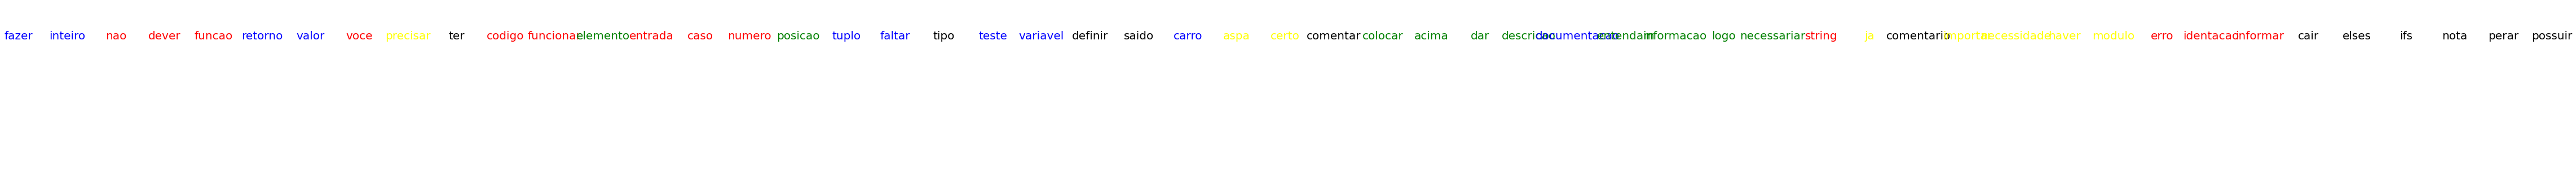

In [62]:
color_words_dict(lda_model, id2word)

In [48]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/lmoraes/.pyenv/versions/machineteaching/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

In [36]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       "display.max_colwidth", 150
                       ):
    print(df_selected["content"].head(1).to_string())


3    não faz sentido restringir preço e dinheiro inteiros


In [ ]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [ ]:
import random
text_data = []
with open('dataset.csv') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

In [34]:
model.topic_words[2]

array(['mesmo', 'nao', 'sobre', 'faz', 'tipo', 'como', 'codigo', 'dentro',
       'faltou', 'esta', 'voce', 'entrada', 'comentario', 'tipos', 'se',
       'por', 'que', 'nota', 'definiu', 'variaveis', 'saida', 'funcao',
       'corretude', 'variavel', 'tupla', 'definir', 'documentacao',
       'comentou', 'entradas', 'string'], dtype='<U12')

dividir em n-gramas

In [13]:
from unidecode import unidecode

aux =' '.join(df['content'].to_list())
aux = unidecode(aux)
aux

'teste solucao so funciona para inteiros  identacao nao faz sentido restringir o preco e o dinheiro para inteiros  nao se esqueca de apagar a linha de instrucao inicial  para ficar mais apresentavel  aquela primeira tentativa estava muito gambiarra! procure sempre fazer o mais simples possivel  se esta indo para gambiarra  nao e um bom sinal sibre a qualidade da solucao  pense bem em como obter a solucao para o problema para nao ficar tentando  correcoes  erradas  o uso de nomes nao significativos atrapalha o raciocinio tambem  nesse caso   ou deve documentar dizendo int  int   > int  a versao mais completa da chamada  ou dar as duas opcoes  algo como int  int   > int ou int   > int  questao 3  errou por detalhe a formula final do retorno de sua funcao  pois devia retornar min  a  2   b  3   c  5   voce ao inves de usar seu parametro "c" para retornar a sua funcao  usou o valor default como cada ingrediente tem um valor diferente voce precisaria retornar min  a  2   b  3   c  5    e es

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

#content = df['content']
content = [aux2]
stop_words_pt = ["de", "da", "do", "o", "os", "a", "as", "um", "uma", "umas", "uns", "qual", "quais", "para", "por", "que"]

model = CountVectorizer( ngram_range = (1,1), stop_words=stop_words_pt)
matrix = model.fit_transform(content).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_output.sum().T.sort_values(ascending=False))

código                 3206
documentação           1708
nota                   1622
corretude              1598
entrada                 508
tipo                    446
função                  436
ser                     406
faltar                  380
saída                   296
não                     248
definir                 226
que                     168
em                      148
saida                   142
comentário              132
variavel                124
fazer                   112
sobre                    96
estar                    94
variável                 92
valor                    88
como                     80
por                      80
string                   76
comentar                 74
ter                      70
você                     64
mesmo                    64
dever                    62
seu                      56
se                       56
tupla                    54
dentro                   54
implementação            48
variávei            

In [102]:
import spacy 
from spellchecker import SpellChecker
import re

spell = SpellChecker()  
aux =' '.join(df['content'].to_list())
print(aux)

portuguese = SpellChecker(language='pt') 

misspelled = portuguese.unknown(aux.split(" "))
misspelled
#df["text"] = [[spell.unknown(word) for word in row] for row in df['content'].str.split(" ").to_list()]
#df["text"]
#df["text"] = df["text"].apply(lambda x: " ".join(x))

teste solução só funciona para inteiros  identação não faz sentido restringir o preço e o dinheiro para inteiros  não se esqueça de apagar a linha de instrução inicial  para ficar mais apresentável  aquela primeira tentativa estava muito gambiarra! procure sempre fazer o mais simples possível  se está indo para gambiarra  não é um bom sinal sibre a qualidade da solução  pense bem em como obter a solução para o problema para não ficar tentando  correções  erradas  o uso de nomes não significativos atrapalha o raciocínio também  nesse caso   ou deve documentar dizendo int  int   > int  a versão mais completa da chamada  ou dar as duas opções  algo como int  int   > int ou int   > int  questão 3  errou por detalhe a fórmula final do retorno de sua função  pois devia retornar min  a  2   b  3   c  5   você ao invés de usar seu parâmetro “c” para retornar a sua função  usou o valor default como cada ingrediente tem um valor diferente você precisaria retornar min  a  2   b  3   c  5    e est

{'',
 '2]',
 '<br',
 'aa',
 'adicioná',
 'ahahhaha',
 'amis',
 'apóstrofes',
 'automáico',
 'ax1',
 'boleano',
 'boleanos',
 'bool',
 'booleana',
 'booleano',
 'bx1',
 'ceil',
 'cetera',
 'checada',
 'claritude',
 'comentáio',
 'concatenar',
 'condicionais',
 'corretude',
 'correção*',
 'criterio',
 'dcumentação',
 'debugar',
 'def',
 'default',
 'defaulta',
 'descontei',
 'descontruir',
 'desecessária',
 'documenação',
 'documentações',
 'elses',
 'encorporou',
 'entrads',
 'entrae',
 'enunciado',
 'esclarecedora',
 'especiifcação',
 'explic',
 'explicitar',
 'explicito',
 'false',
 'fatiamento',
 'filtra_pares',
 'float',
 'funlção',
 'gambiarra',
 'gambiarra!',
 'identação',
 'idle',
 'ifs',
 'incorreta',
 'incorretas',
 'indice',
 'input',
 'int',
 'list',
 'mairo',
 'maiúscula',
 'math',
 'modulo',
 'num_bombons',
 'obs',
 'ordedano',
 'paloma',
 'permutar',
 'primeir',
 'quina',
 'return',
 'retângulo',
 'retângulos',
 'sibre',
 'sna',
 'str',
 'string',
 'strings',
 'sáida',
 't

In [104]:
aux = nlp(aux)
#load_model = spacy.load(pt, disable = ['parser','ner'])
aux2 = " ".join([token.lemma_ for token in aux])
aux2
#for token in aux:
##    token.lema_.tolist()
  #  print(token, token.lemma_)



'teste solução só funcionar para inteiro   identação não fazer sentido restringir o preço e o dinheiro para inteiro   não se esquecer de apagar o linha de instrução inicial   para ficar mais apresentável   aquele primeiro tentativa estar muito gambiarra ! procurar sempre fazer o mais simples possível   se estar ir para gambiarra   não ser um bom sinal sibrir o qualidade de o solução   pensar bem em como obter o solução para o problema para não ficar tentar   correção   errado   o uso de nome não significativo atrapalhar o raciocínio também   em esse caso    ou dever documentar dizer int   int    > int   o versão mais completo de o chamada   ou dar o dois opção   algo como int   int    > int ou int    > int   questão 3   errar por detalhe o fórmula final de o retorno de seu função   pois dever retornar min   a   2    b   3    c   5    você a o invés de usar seu parâmetro “ c ” para retornar o seu função   usar o valor default como cada ingrediente ter um valor diferente você precisar re

In [107]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words_pt = ["de", "da", "do", "o", "os", "a", "as", "um", "uma", "umas", "uns", "qual", "quais", "para" ]

#content = df['content']
content = [aux2]

model = CountVectorizer( ngram_range = (2,2), stop_words=stop_words_pt)
matrix = model.fit_transform(content).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_output.sum().T.sort_values(ascending=False))

corretude código                       1598
documentação código                    1594
código documentação                    1584
nota corretude                         1494
código nota                            1266
entrada saída                           268
tipo entrada                            220
código faltar                           200
função nota                             152
faltar definir                          136
definir tipo                            126
entrada saida                           124
saída função                            116
faltar tipo                             110
tipo variavel                            94
variavel entrada                         80
ser tipo                                 74
comentar sobre                           68
definir ser                              66
variável entrada                         64
tipo variável                            62
saida faltar                             60
ser string                      

In [108]:
model = CountVectorizer( ngram_range = (3,3), stop_words=stop_words_pt)
matrix = model.fit_transform(content).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_output.sum().T.sort_values(ascending=False))

código documentação código                      1568
corretude código documentação                   1566
nota corretude código                           1494
documentação código nota                        1266
código nota corretude                           1208
documentação código faltar                       200
tipo entrada saída                               172
função nota corretude                            120
entrada saída função                             116
saída função nota                                110
código faltar tipo                               108
faltar tipo entrada                              108
variavel entrada saida                            78
tipo variavel entrada                             70
faltar definir ser                                66
definir ser tipo                                  66
ser tipo variavel                                 64
faltar definir tipo                               62
entrada saida faltar                          

In [113]:
model = CountVectorizer( ngram_range = (4,4), stop_words=stop_words_pt)
matrix = model.fit_transform(content).toarray()
df_output = pd.DataFrame(data = matrix, columns = model.get_feature_names_out())

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_output.sum().T.sort_values(ascending=False))

corretude código documentação código                  1564
nota corretude código documentação                    1464
código documentação código nota                       1244
documentação código nota corretude                    1208
código nota corretude código                          1208
código documentação código faltar                      198
função nota corretude código                           120
tipo entrada saída função                              112
entrada saída função nota                              110
documentação código faltar tipo                        108
código faltar tipo entrada                             106
faltar tipo entrada saída                              100
saída função nota corretude                             82
tipo variavel entrada saida                             70
faltar definir ser tipo                                 66
definir ser tipo variavel                               64
ser tipo variavel entrada                               

In [114]:
from nltk.test.portuguese_en_fixt import setup_module
import nltk
#nltk.download()
setup_module()

Skipped: portuguese_en.doctest imports nltk.examples.pt which doesn't exist!